# Análise dos Dados dos Algoritmos ACO e GRASP

Neste notebook, vamos analisar os dados salvos dos algoritmos GRASP e Colônia de Formigas aplicados ao problema do caixeiro viajante. Vamos carregar os dados salvos com `np.savez`, convertê-los para DataFrames e criar gráficos para analisar diferentes aspectos de sua qualidade e execução.


## Importando bibliotecas

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Ulysses16

### GRASP (df_grasp_ulysses16)

In [5]:
def carregar_dados_grasp(arquivo):
    """Carrega e agrega dados do arquivo NPZ."""
    dados_grasp = np.load(arquivo, allow_pickle=True)
    execucoes_grasp_ulysses16 = []

    chave = 'resultados_grasp'
    if chave in dados_grasp:
        dados = dados_grasp[chave]
        if isinstance(dados, np.ndarray):
            for execucao_dados in dados:
                if isinstance(execucao_dados, dict):
                    # Adiciona a chave 'execucao' para identificar a execução
                    execucao_dados['execucao'] = execucao_dados.get('execucao_num', None)
                    execucoes_grasp_ulysses16.append(execucao_dados)
                else:
                    print(f"Tipo de dados inesperado na execução: {type(execucao_dados)}")
        else:
            print(f"Tipo de dados inesperado para a chave {chave}: {type(dados)}")
    else:
        print(f"Chave {chave} não encontrada no arquivo NPZ.")

    return execucoes_grasp_ulysses16

def criar_dataframe_resultados(arquivo):
    """Cria um DataFrame com base nos resultados carregados do arquivo NPZ."""
    execucoes_grasp_ulysses16 = carregar_dados_grasp(arquivo)
    df = pd.DataFrame(execucoes_grasp_ulysses16)
        
    return df

# Carregar e criar DataFrame de resultados
df_grasp_ulysses16 = criar_dataframe_resultados('./resultados/resultados_grasp_ulysses.npz')

# Verificar as colunas do DataFrame
print("Colunas do DataFrame:", df_grasp_ulysses16.columns)

# Mostrar DataFrame com execuções e distância total (apenas os 30 primeiros dados)
try:
    print(df_grasp_ulysses16[['execucao', 'distancia_total', 'melhor_caminho']])
except KeyError as e:
    print(f"Erro ao acessar colunas: {e}")



Colunas do DataFrame: Index(['execucao_num', 'melhor_caminho', 'tempo_execucao', 'distancia_total',
       'historico_custos', 'execucao'],
      dtype='object')
    execucao  distancia_total  \
0          1        73.987618   
1          2        73.987618   
2          3        73.987618   
3          4        73.987618   
4          5        73.987618   
5          6        73.987618   
6          7        73.987618   
7          8        73.987618   
8          9        73.987618   
9         10        73.987618   
10        11        73.987618   
11        12        73.987618   
12        13        73.987618   
13        14        73.987618   
14        15        73.987618   
15        16        73.987618   
16        17        73.987618   
17        18        73.987618   
18        19        73.987618   
19        20        73.987618   
20        21        73.987618   
21        22        73.987618   
22        23        73.987618   
23        24        73.987618   
24        25 

### ACO (df_aco_ulysses16)

In [6]:
def carregar_dados_aco(arquivo):
    """Carrega e agrega dados do arquivo NPZ."""
    dados_aco = np.load(arquivo, allow_pickle=True)
    execucoes_aco_ulysses16 = []

    chave = 'resultados_aco'
    if chave in dados_aco:
        dados = dados_aco[chave]
        if isinstance(dados, np.ndarray):
            for execucao_dados in dados:
                if isinstance(execucao_dados, dict):
                    # Adiciona a chave 'execucao' para identificar a execução
                    execucao_dados['execucao'] = execucao_dados.get('execucao_num', None)
                    execucoes_aco_ulysses16.append(execucao_dados)
                else:
                    print(f"Tipo de dados inesperado na execução: {type(execucao_dados)}")
        else:
            print(f"Tipo de dados inesperado para a chave {chave}: {type(dados)}")
    else:
        print(f"Chave {chave} não encontrada no arquivo NPZ.")

    return execucoes_aco_ulysses16

def criar_dataframe_resultados(arquivo):
    """Cria um DataFrame com base nos resultados carregados do arquivo NPZ."""
    execucoes_aco_ulysses16 = carregar_dados_aco(arquivo)
    df = pd.DataFrame(execucoes_aco_ulysses16)
        
    return df

# Carregar e criar DataFrame de resultados
df_aco_ulysses16 = criar_dataframe_resultados('./resultados/resultados_aco_ulysses.npz')

# Verificar as colunas do DataFrame
print("Colunas do DataFrame:", df_aco_ulysses16.columns)

# Mostrar DataFrame com execuções e distância total (apenas os 30 primeiros dados)
try:
    print(df_aco_ulysses16[['execucao', 'distancia_total', 'melhor_caminho', 'tempo_execucao']])
except KeyError as e:
    print(f"Erro ao acessar colunas: {e}")



Colunas do DataFrame: Index(['execucao_num', 'melhor_caminho', 'tempo_execucao', 'distancia_total',
       'historico_custos', 'execucao'],
      dtype='object')
    execucao  distancia_total  \
0          1        74.001336   
1          2        74.001336   
2          3        74.001336   
3          4        74.108736   
4          5        74.108736   
5          6        74.233330   
6          7        74.460168   
7          8        74.614804   
8          9        74.233330   
9         10        74.334649   
10        11        74.614804   
11        12        74.108736   
12        13        74.614804   
13        14        74.233330   
14        15        74.001336   
15        16        74.406452   
16        17        74.343897   
17        18        74.614804   
18        19        74.334649   
19        20        74.001336   
20        21        74.614804   
21        22        74.108736   
22        23        74.343897   
23        24        73.999826   
24        25 

# Berlin52

### GRASP ALPHA 0.5 (df_grasp_berlin52)

In [7]:
def carregar_dados_grasp(arquivo):
    """Carrega e agrega dados do arquivo NPZ."""
    dados_grasp = np.load(arquivo, allow_pickle=True)
    execucoes_grasp = []

    # Supondo que os dados estejam sob a chave 'resultados_grasp'
    chave = 'resultados_grasp'
    if chave in dados_grasp:
        dados = dados_grasp[chave]
        if isinstance(dados, np.ndarray):
            for execucao_dados in dados:
                if isinstance(execucao_dados, dict):
                    # Adiciona a chave 'execucao' para identificar a execução
                    execucao_dados['execucao'] = execucao_dados.get('execucao_num', None)
                    execucoes_grasp.append(execucao_dados)
                else:
                    print(f"Tipo de dados inesperado na execução: {type(execucao_dados)}")
        else:
            print(f"Tipo de dados inesperado para a chave {chave}: {type(dados)}")
    else:
        print(f"Chave {chave} não encontrada no arquivo NPZ.")

    return execucoes_grasp



def criar_dataframe_resultados(arquivo):
    """Cria um DataFrame com base nos resultados carregados do arquivo NPZ."""
    execucoes_grasp = carregar_dados_grasp(arquivo)
    df = pd.DataFrame(execucoes_grasp)
    
    # Manter apenas as 30 primeiras linhas e descartar as demais
    df = df.iloc[:30].reset_index(drop=True)
    
    return df

# Carregar e criar DataFrame de resultados
df_grasp_berlin52 = criar_dataframe_resultados('./resultados/resultados_grasp_berlin52.npz')

# Verificar as colunas do DataFrame
print("Colunas do DataFrame:", df_grasp_berlin52.columns)

# Mostrar DataFrame com execuções e distância total (apenas os 30 primeiros dados)
try:
    print(df_grasp_berlin52[['execucao', 'distancia_total', 'melhor_caminho']])
except KeyError as e:
    print(f"Erro ao acessar colunas: {e}")



Colunas do DataFrame: Index(['execucao_num', 'melhor_caminho', 'tempo_execucao', 'distancia_total',
       'historico_custos', 'execucao'],
      dtype='object')
    execucao  distancia_total  \
0          1      7619.153101   
1          2      7544.365902   
2          3      7544.365902   
3          4      7544.365902   
4          5      7544.365902   
5          6      7716.857573   
6          7      7606.948444   
7          8      7598.442341   
8          9      7544.365902   
9         10      7544.365902   
10        11      7544.365902   
11        12      7598.442341   
12        13      7544.365902   
13        14      7544.365902   
14        15      7544.365902   
15        16      7606.948444   
16        17      7544.365902   
17        18      7544.365902   
18        19      7629.872462   
19        20      7598.442341   
20        21      7606.948444   
21        22      7544.365902   
22        23      7606.948444   
23        24      7619.153101   
24        25 

### GRASP ALPHA 0.1 (df_grasp_alpha_menor_berlin52)

In [8]:
def carregar_dados_grasp(arquivo):
    """Carrega e agrega dados do arquivo NPZ."""
    dados_grasp = np.load(arquivo, allow_pickle=True)
    execucoes_grasp_alpha_menor = []

    # Supondo que os dados estejam sob a chave 'resultados_grasp'
    chave = 'resultados_grasp'
    if chave in dados_grasp:
        dados = dados_grasp[chave]
        if isinstance(dados, np.ndarray):
            for execucao_dados in dados:
                if isinstance(execucao_dados, dict):
                    # Adiciona a chave 'execucao' para identificar a execução
                    execucao_dados['execucao'] = execucao_dados.get('execucao_num', None)
                    execucoes_grasp_alpha_menor.append(execucao_dados)
                else:
                    print(f"Tipo de dados inesperado na execução: {type(execucao_dados)}")
        else:
            print(f"Tipo de dados inesperado para a chave {chave}: {type(dados)}")
    else:
        print(f"Chave {chave} não encontrada no arquivo NPZ.")

    return execucoes_grasp_alpha_menor


def criar_dataframe_resultados(arquivo):
    """Cria um DataFrame com base nos resultados carregados do arquivo NPZ."""
    execucoes_grasp_alpha_menor = carregar_dados_grasp(arquivo)
    df = pd.DataFrame(execucoes_grasp_alpha_menor)
    
    # Manter apenas as 30 primeiras linhas e descartar as demais
    df = df.iloc[:30].reset_index(drop=True)
    
    return df

# Carregar e criar DataFrame de resultados
df_grasp_alpha_menor_berlin52 = criar_dataframe_resultados('./resultados/resultados_grasp_berlin52_amenor.npz')

# Verificar as colunas do DataFrame
print("Colunas do DataFrame:", df_grasp_alpha_menor_berlin52.columns)

# Mostrar DataFrame com execuções e distância total (apenas os 30 primeiros dados)
try:
    print(df_grasp_alpha_menor_berlin52[['execucao', 'distancia_total', 'melhor_caminho']])
except KeyError as e:
    print(f"Erro ao acessar colunas: {e}")



Colunas do DataFrame: Index(['execucao_num', 'melhor_caminho', 'tempo_execucao', 'distancia_total',
       'historico_custos', 'execucao'],
      dtype='object')
    execucao  distancia_total  \
0          1      7544.365902   
1          2      7544.365902   
2          3      7544.365902   
3          4      7544.365902   
4          5      7544.365902   
5          6      7544.365902   
6          7      7544.365902   
7          8      7544.365902   
8          9      7544.365902   
9         10      7544.365902   
10        11      7544.365902   
11        12      7598.442341   
12        13      7656.578347   
13        14      7598.442341   
14        15      7544.365902   
15        16      7619.153101   
16        17      7544.365902   
17        18      7544.365902   
18        19      7544.365902   
19        20      7544.365902   
20        21      7544.365902   
21        22      7544.365902   
22        23      7544.365902   
23        24      7544.365902   
24        25 

### ACO (df_aco)

In [8]:
def carregar_dados_aco(arquivo):
    """Carrega e agrega dados do arquivo NPZ."""
    dados_aco = np.load(arquivo, allow_pickle=True)
    execucoes_aco = []

    # Supondo que os dados estejam sob a chave 'resultados_aco'
    chave = 'resultados_aco'
    if chave in dados_aco:
        dados = dados_aco[chave]
        if isinstance(dados, np.ndarray):
            for execucao_dados in dados:
                if isinstance(execucao_dados, dict):
                    # Adiciona a chave 'execucao' para identificar a execução
                    execucao_dados['execucao'] = execucao_dados.get('execucao_num', None)
                    execucoes_aco.append(execucao_dados)
                else:
                    print(f"Tipo de dados inesperado na execução: {type(execucao_dados)}")
        else:
            print(f"Tipo de dados inesperado para a chave {chave}: {type(dados)}")
    else:
        print(f"Chave {chave} não encontrada no arquivo NPZ.")

    return execucoes_aco


In [9]:
def processar_dados_aco(dados):
    if isinstance(dados, list) and all(isinstance(item, dict) for item in dados):
        return pd.DataFrame({
            'execucao': [item.get('execucao') for item in dados],
            'melhor_caminho': [item.get('melhor_caminho') for item in dados],
            'distancia_total': [item.get('distancia_total') for item in dados],
            'tempo_execucao': [item.get('tempo_execucao') for item in dados],
            'historico_custos': [item.get('historico_custos') for item in dados]
        })
    else:
        raise ValueError("Estrutura dos dados não reconhecida.")

# Carregar e processar dados
execucoes_aco = carregar_dados_aco('./resultados/resultados_aco_berlin52.npz')
if execucoes_aco:
    df_aco_berlin52 = processar_dados_aco(execucoes_aco)
    # Exibir as primeiras linhas do DataFrame
    print(df_aco_berlin52.head(30))
else:
    print("Nenhum dado foi carregado.")


    execucao                                     melhor_caminho  \
0          1  [(38, 39), (39, 36), (36, 37), (37, 47), (47, ...   
1          2  [(48, 31), (31, 44), (44, 18), (18, 40), (40, ...   
2          3  [(14, 5), (5, 3), (3, 24), (24, 11), (11, 27),...   
3          4  [(38, 39), (39, 37), (37, 47), (47, 23), (23, ...   
4          5  [(21, 0), (0, 48), (48, 31), (31, 44), (44, 18...   
5          6  [(0, 21), (21, 48), (48, 31), (31, 44), (44, 1...   
6          7  [(48, 31), (31, 44), (44, 18), (18, 40), (40, ...   
7          8  [(35, 34), (34, 33), (33, 43), (43, 0), (0, 21...   
8          9  [(37, 36), (36, 39), (39, 38), (38, 35), (35, ...   
9         10  [(21, 0), (0, 48), (48, 31), (31, 44), (44, 18...   
10        11  [(21, 0), (0, 48), (48, 31), (31, 44), (44, 18...   
11        12  [(5, 3), (3, 24), (24, 11), (11, 27), (27, 26)...   
12        13  [(24, 11), (11, 27), (27, 26), (26, 25), (25, ...   
13        14  [(21, 0), (0, 48), (48, 31), (31, 44), (44, 18..

### Consultar as colunas do data frame

In [10]:
print(df_aco_berlin52.columns)
print(df_grasp_berlin52.columns)
print(df_grasp_alpha_menor_berlin52.columns)
print(df_grasp_ulysses16.columns)
print(df_aco_ulysses16.columns)

Index(['execucao', 'melhor_caminho', 'distancia_total', 'tempo_execucao',
       'historico_custos'],
      dtype='object')
Index(['execucao_num', 'melhor_caminho', 'tempo_execucao', 'distancia_total',
       'historico_custos', 'execucao'],
      dtype='object')
Index(['execucao_num', 'melhor_caminho', 'tempo_execucao', 'distancia_total',
       'historico_custos', 'execucao'],
      dtype='object')
Index(['execucao_num', 'melhor_caminho', 'tempo_execucao', 'distancia_total',
       'historico_custos', 'execucao'],
      dtype='object')
Index(['execucao_num', 'melhor_caminho', 'tempo_execucao', 'distancia_total',
       'historico_custos', 'execucao'],
      dtype='object')


# Análise Estatística

Vamos realizar uma análise detalhada dos tempos de execução e das soluções encontradas para os algoritmos ACO e GRASP.



# Análise e Visualização

### Comparação de média de tempo de execução

In [11]:

# BERLIN 52 - MÉDIA DE TEMPO
mean_tempo_grasp = df_grasp_berlin52['tempo_execucao'].mean()
mean_tempo_grasp_alpha_menor = df_grasp_alpha_menor_berlin52['tempo_execucao'].mean()
mean_tempo_aco = df_aco_berlin52['tempo_execucao'].mean()


# BERLIN 52 - MENORES DISTÂNCIAS
min_dist_grasp = df_grasp_berlin52['distancia_total'].min()
min_dist_grasp_alpha_menor = df_grasp_alpha_menor_berlin52['distancia_total'].min()
min_dist_aco = df_aco_berlin52['distancia_total'].min()

# Exibir os resultados por algoritmo
print(f"GRASP - Média de Tempo de Execução: {mean_tempo_grasp_alpha_menor}, Distância Total Mínima: {min_dist_grasp_alpha_menor}")
print(f"ACO - Média de Tempo de Execução: {mean_tempo_aco}, Distância Total Mínima: {min_dist_aco}")




GRASP - Média de Tempo de Execução: 342.45047946770984, Distância Total Mínima: 7544.365901904089
ACO - Média de Tempo de Execução: 164.40117818514506, Distância Total Mínima: 7544.365901904086


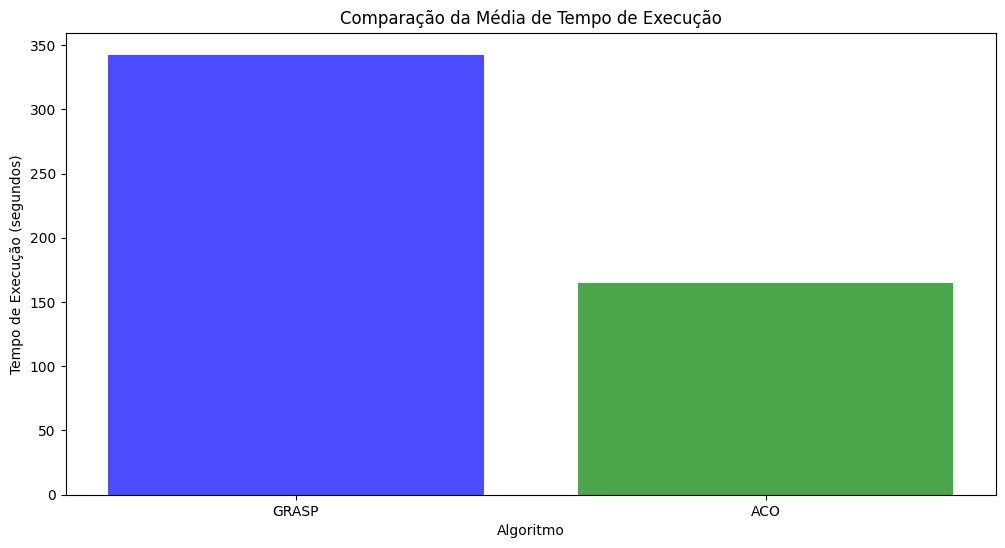

In [12]:

algoritmos = ['GRASP', 'ACO']
tempos_execucao = [mean_tempo_grasp_alpha_menor, mean_tempo_aco]
distancias_totais_min = [min_dist_grasp, min_dist_grasp_alpha_menor, min_dist_aco]

# Configuração do gráfico
plt.figure(figsize=(12, 6))

# Criar gráfico de barras
plt.bar(algoritmos, tempos_execucao, color=['blue', 'green'], alpha=0.7)

# Adicionar título e rótulos
plt.title('Comparação da Média de Tempo de Execução')
plt.xlabel('Algoritmo')
plt.ylabel('Tempo de Execução (segundos)')

# Mostrar gráfico
plt.show()

### Distribuição da distância total

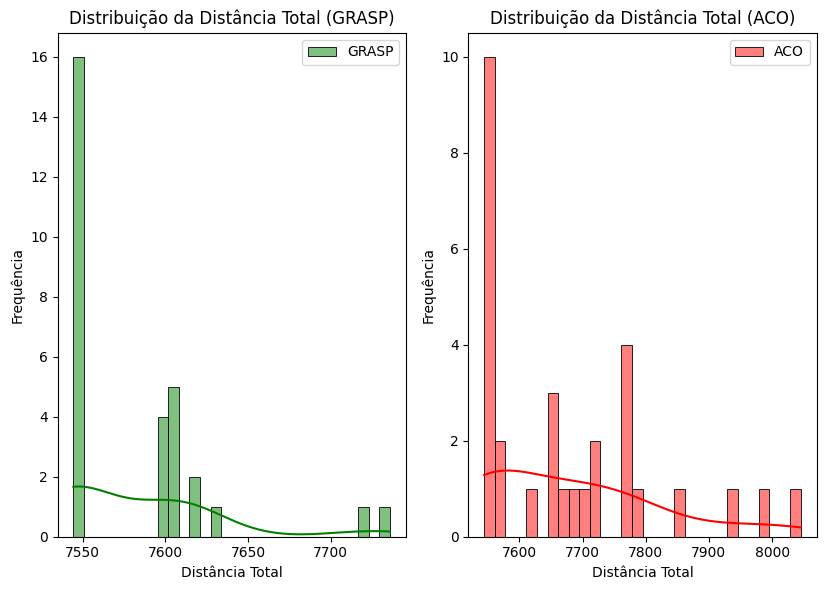

In [13]:

plt.figure(figsize=(12, 6)) 

# Subplot para GRASP
plt.subplot(1, 3, 2)
sns.histplot(df_grasp_berlin52['distancia_total'].dropna(), bins=30, kde=True, color='green', label='GRASP', alpha=0.5)
plt.title('Distribuição da Distância Total (GRASP)')
plt.xlabel('Distância Total')
plt.ylabel('Frequência')
plt.legend()

# Subplot para ACO
plt.subplot(1, 3, 3)
sns.histplot(df_aco_berlin52['distancia_total'].dropna(), bins=30, kde=True, color='red', label='ACO', alpha=0.5)
plt.title('Distribuição da Distância Total (ACO)')
plt.xlabel('Distância Total')
plt.ylabel('Frequência')
plt.legend()

# Ajustar layout
plt.tight_layout()
plt.show()


### Gráfico de dispersão: tempo de execução vs distância total

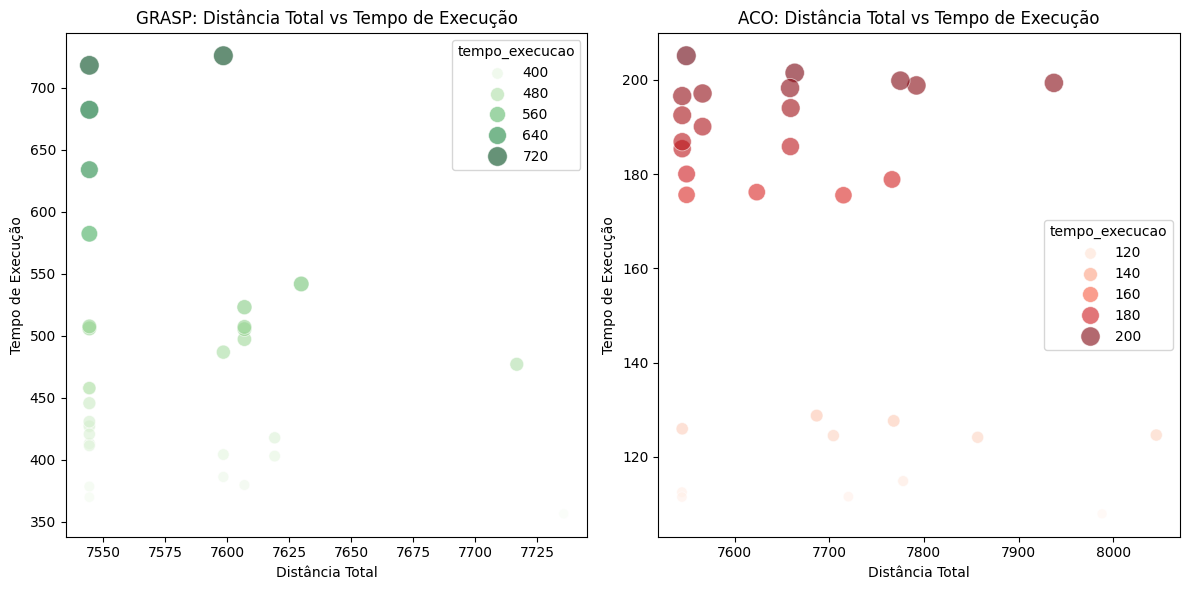

In [14]:
# Configurações do gráfico
plt.figure(figsize=(12, 6))

# GRASP Alpha
plt.subplot(1, 2, 1)
sns.scatterplot(x='distancia_total', y='tempo_execucao', data=df_grasp_berlin52, size='tempo_execucao', hue='tempo_execucao', palette='Greens', alpha=0.6, sizes=(50, 200))
plt.title('GRASP: Distância Total vs Tempo de Execução')
plt.xlabel('Distância Total')
plt.ylabel('Tempo de Execução')

# ACO
plt.subplot(1, 2, 2)
sns.scatterplot(x='distancia_total', y='tempo_execucao', data=df_aco_berlin52, size='tempo_execucao', hue='tempo_execucao', palette='Reds', alpha=0.6, sizes=(50, 200))
plt.title('ACO: Distância Total vs Tempo de Execução')
plt.xlabel('Distância Total')
plt.ylabel('Tempo de Execução')

# Ajustar layout
plt.tight_layout()
plt.show()


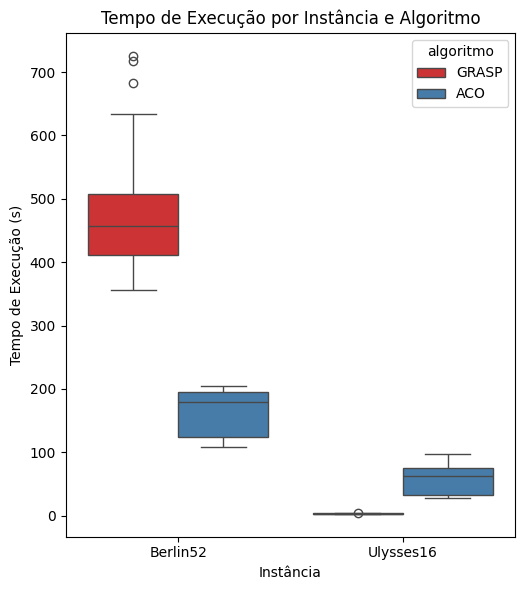

In [15]:
# Adicionar instância e algoritmo aos dataframes
df_grasp_berlin52['instancia'] = 'Berlin52'
df_aco_berlin52['instancia'] = 'Berlin52'
df_grasp_ulysses16['instancia'] = 'Ulysses16'
df_aco_ulysses16['instancia'] = 'Ulysses16'

# Combinar dataframes para comparação
df_combined = pd.concat([
    df_grasp_berlin52[['distancia_total', 'tempo_execucao', 'instancia', 'execucao']].assign(algoritmo='GRASP'),
    df_aco_berlin52[['distancia_total', 'tempo_execucao', 'instancia', 'execucao']].assign(algoritmo='ACO'),
    df_grasp_ulysses16[['distancia_total', 'tempo_execucao', 'instancia', 'execucao']].assign(algoritmo='GRASP'),
    df_aco_ulysses16[['distancia_total', 'tempo_execucao', 'instancia', 'execucao']].assign(algoritmo='ACO')
])

# Plotar o desempenho
plt.figure(figsize=(10, 6))

# Tempo de Execução
plt.subplot(1, 2, 2)
sns.boxplot(data=df_combined, x='instancia', y='tempo_execucao', hue='algoritmo', palette='Set1')
plt.title('Tempo de Execução por Instância e Algoritmo')
plt.xlabel('Instância')
plt.ylabel('Tempo de Execução (s)')

plt.tight_layout()
plt.show()


### Variação do tempo de execuçao a cada execução

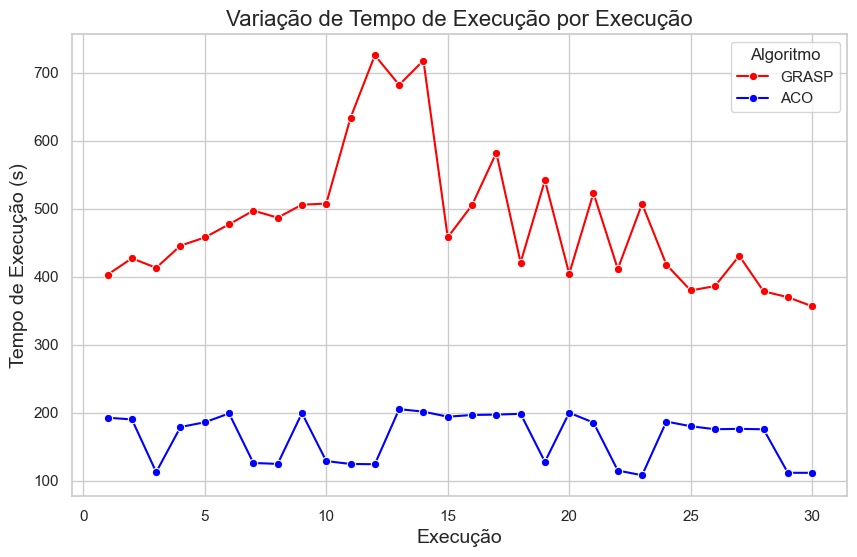

In [16]:
# Definindo o estilo do Seaborn para melhorar a aparência
sns.set(style="whitegrid")

# Criando o gráfico de linha para a variação do tempo a cada execução
plt.figure(figsize=(10, 6))

# Plotando o tempo de execução para GRASP
sns.lineplot(x='execucao', y='tempo_execucao', data=df_grasp_berlin52, label='GRASP', marker='o', color='red')

# Plotando o tempo de execução para ACO
sns.lineplot(x='execucao', y='tempo_execucao', data=df_aco_berlin52, label='ACO', marker='o', color='blue')

# Adicionando títulos e rótulos aos eixos
plt.title('Variação de Tempo de Execução por Execução', fontsize=16)
plt.xlabel('Execução', fontsize=14)
plt.ylabel('Tempo de Execução (s)', fontsize=14)

# Exibindo a legenda
plt.legend(title='Algoritmo')

# Exibindo o gráfico
plt.show()


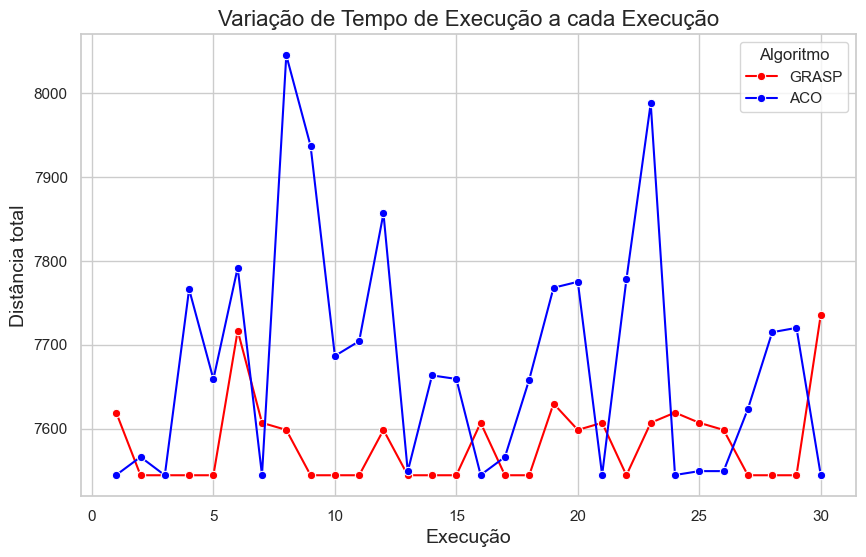

In [17]:
# Definindo o estilo do Seaborn para melhorar a aparência
sns.set(style="whitegrid")

# Criando o gráfico de linha para a variação do tempo a cada execução
plt.figure(figsize=(10, 6))

# Plotando o tempo de execução para GRASP
sns.lineplot(x='execucao', y='distancia_total', data=df_grasp_berlin52, label='GRASP', marker='o', color='red')

# Plotando o tempo de execução para ACO
sns.lineplot(x='execucao', y='distancia_total', data=df_aco_berlin52, label='ACO', marker='o', color='blue')

# Adicionando títulos e rótulos aos eixos
plt.title('Variação de Tempo de Execução a cada Execução', fontsize=16)
plt.xlabel('Execução', fontsize=14)
plt.ylabel('Distância total', fontsize=14)

# Exibindo a legenda
plt.legend(title='Algoritmo')

# Exibindo o gráfico
plt.show()


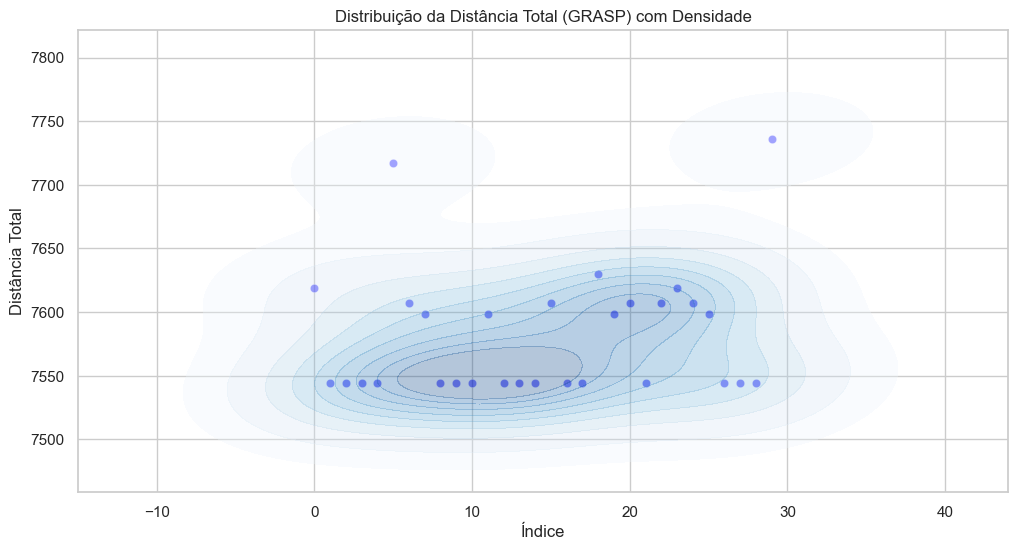

In [18]:
# Gráfico de densidade com scatterplot (GRASP)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_grasp_berlin52.index, y=df_grasp_berlin52['distancia_total'], alpha=0.5, color='blue')
sns.kdeplot(x=df_grasp_berlin52.index, y=df_grasp_berlin52['distancia_total'], cmap='Blues', fill=True, alpha=0.3)
plt.title('Distribuição da Distância Total (GRASP) com Densidade')
plt.xlabel('Índice')
plt.ylabel('Distância Total')
plt.show()

# Distribuição da distância total para GRASP com alpha = 0.5


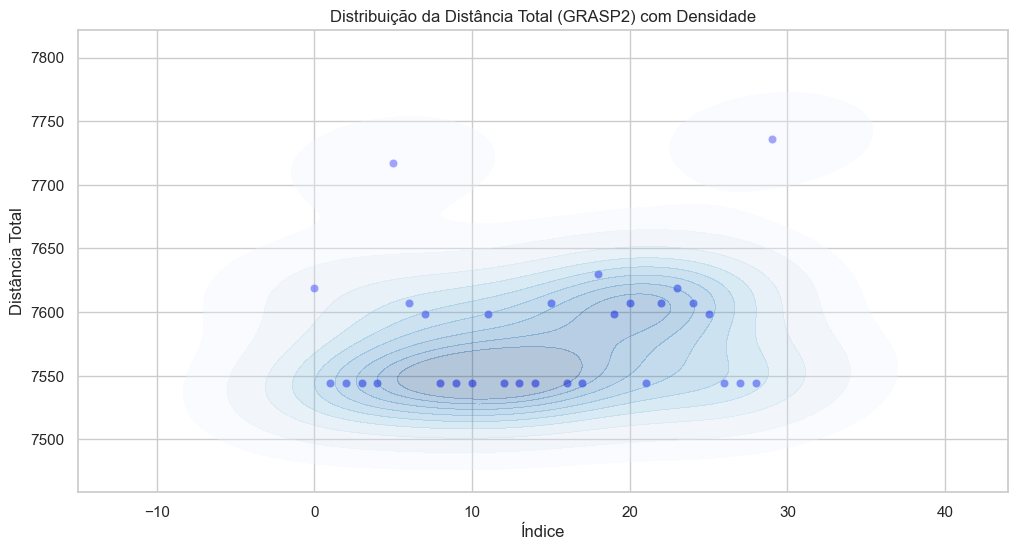

In [19]:
# Gráfico de densidade com scatterplot para GRASP
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_grasp_berlin52.index, y=df_grasp_berlin52['distancia_total'], alpha=0.5, color='blue')
sns.kdeplot(x=df_grasp_berlin52.index, y=df_grasp_berlin52['distancia_total'], cmap='Blues', fill=True, alpha=0.3)
plt.title('Distribuição da Distância Total (GRASP2) com Densidade')
plt.xlabel('Índice')
plt.ylabel('Distância Total')
plt.show()

### Distribuição do Tempo de Execução para GRASP com alpha = 0.1

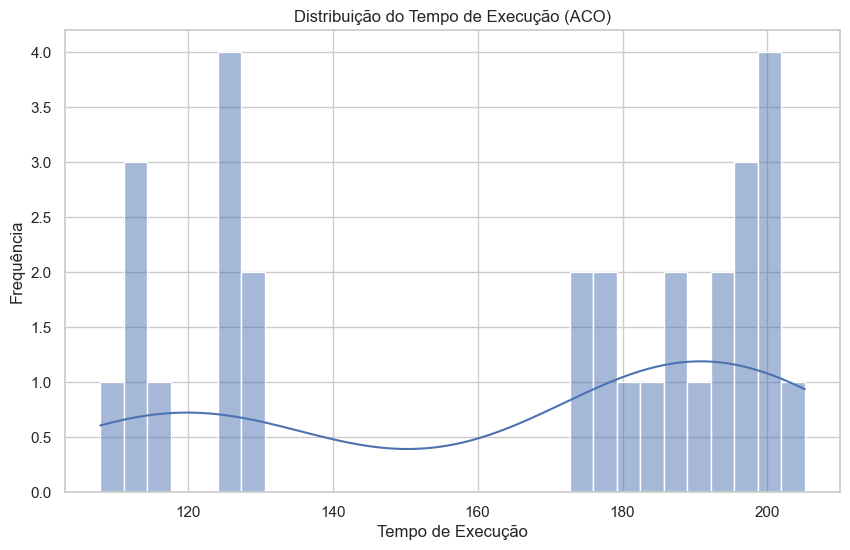

In [20]:
# Gráfico da distribuição do tempo de execução para GRASP
plt.figure(figsize=(10, 6))
sns.histplot(df_aco_berlin52['tempo_execucao'].dropna(), bins=30, kde=True)
plt.title('Distribuição do Tempo de Execução (ACO)')
plt.xlabel('Tempo de Execução')
plt.ylabel('Frequência')
plt.show()


### Distribuição do Tempo de Execução para GRASP com alpha = 0.5

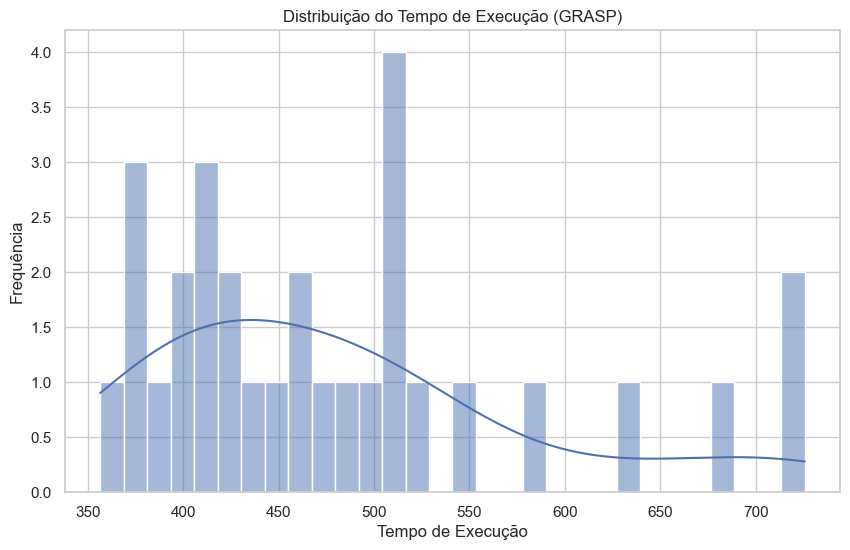

In [21]:
# Gráfico da distribuição do tempo de execução para GRASP
plt.figure(figsize=(10, 6))
sns.histplot(df_grasp_berlin52['tempo_execucao'].dropna(), bins=30, kde=True)
plt.title('Distribuição do Tempo de Execução (GRASP)')
plt.xlabel('Tempo de Execução')
plt.ylabel('Frequência')
plt.show()


### Distribuição da Distância Total para ACO


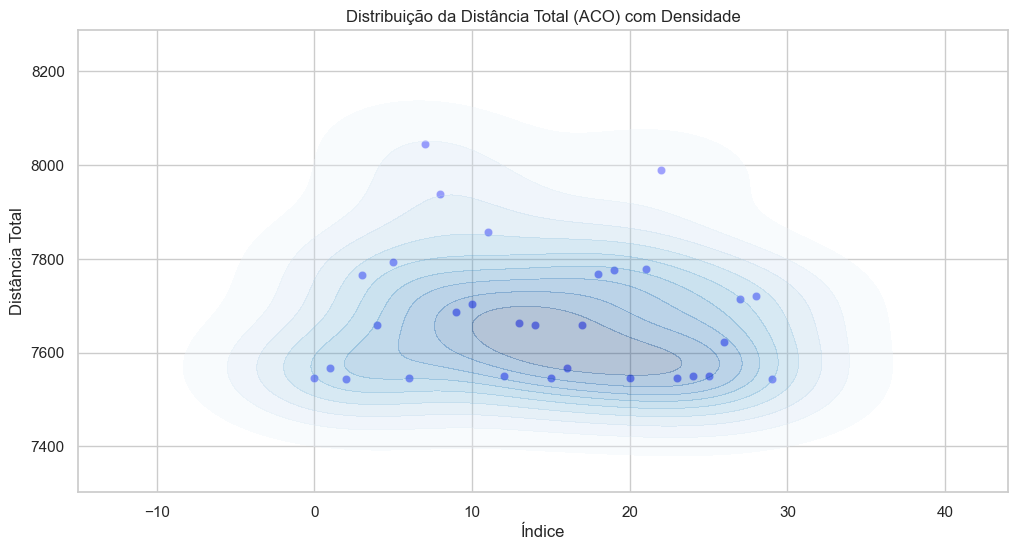

In [22]:
# Gráfico de densidade com scatterplot para ACO
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_aco_berlin52.index, y=df_aco_berlin52['distancia_total'], alpha=0.5, color='blue')
sns.kdeplot(x=df_aco_berlin52.index, y=df_aco_berlin52['distancia_total'], cmap='Blues', fill=True, alpha=0.3)
plt.title('Distribuição da Distância Total (ACO) com Densidade')
plt.xlabel('Índice')
plt.ylabel('Distância Total')
plt.show()

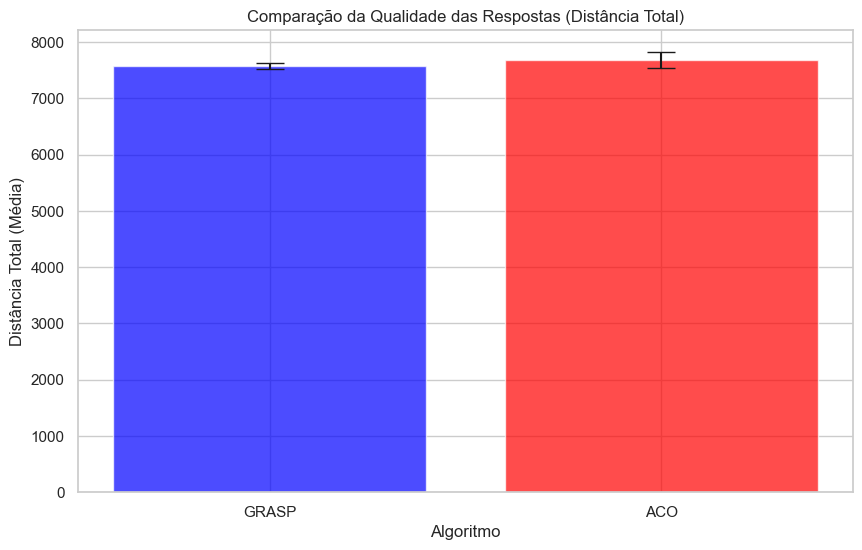

In [23]:
# Calcular a média e o desvio padrão da distância total para cada algoritmo
mean_grasp = df_grasp_berlin52['distancia_total'].mean()
std_grasp = df_grasp_berlin52['distancia_total'].std()

mean_aco = df_aco_berlin52['distancia_total'].mean()
std_aco = df_aco_berlin52['distancia_total'].std()

# Criar um gráfico de barras para comparar as distâncias totais
algoritmos = ['GRASP', 'ACO']
medias = [mean_grasp, mean_aco]
desvios = [std_grasp, std_aco]

plt.figure(figsize=(10, 6))

# Gráfico de barras agrupadas
plt.bar(algoritmos, medias, yerr=desvios, capsize=10, color=['blue', 'red'], alpha=0.7)

# Adicionar título e rótulos
plt.title('Comparação da Qualidade das Respostas (Distância Total)')
plt.ylabel('Distância Total (Média)')
plt.xlabel('Algoritmo')

plt.show()


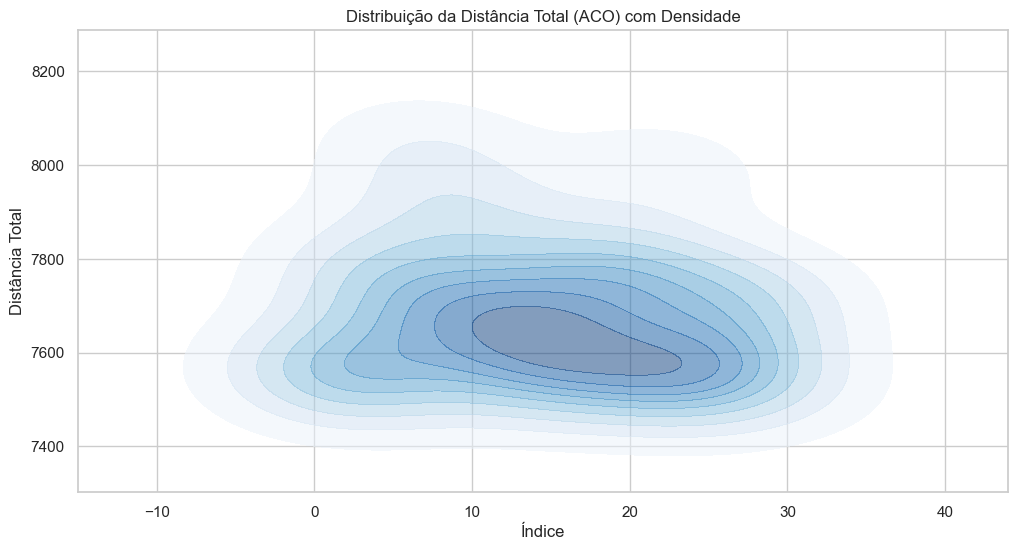

In [24]:
# Gráfico de densidade (KDE) para ACO
plt.figure(figsize=(12, 6))

# KDE bivariado da distância total e o índice
sns.kdeplot(x=df_aco_berlin52.index, y=df_aco_berlin52['distancia_total'], cmap='Blues', fill=True, alpha=0.5)

plt.title('Distribuição da Distância Total (ACO) com Densidade')
plt.xlabel('Índice')
plt.ylabel('Distância Total')
plt.show()


### Distribuição do Tempo de Execução para ACO


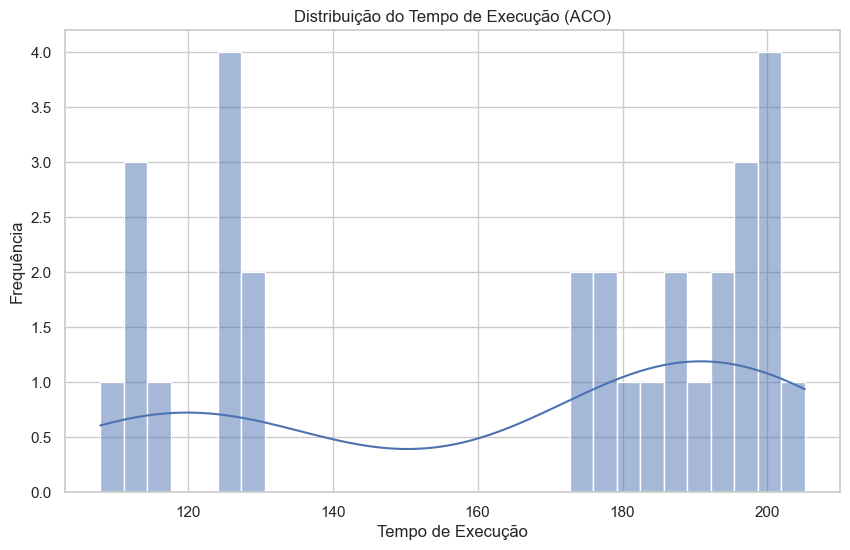

In [25]:
# Gráfico da distribuição do tempo de execução para ACO
plt.figure(figsize=(10, 6))
sns.histplot(df_aco_berlin52['tempo_execucao'].dropna(), bins=30, kde=True)
plt.title('Distribuição do Tempo de Execução (ACO)')
plt.xlabel('Tempo de Execução')
plt.ylabel('Frequência')
plt.show()


### Comparar Distribuição da Distância Total entre GRASP2 e ACO


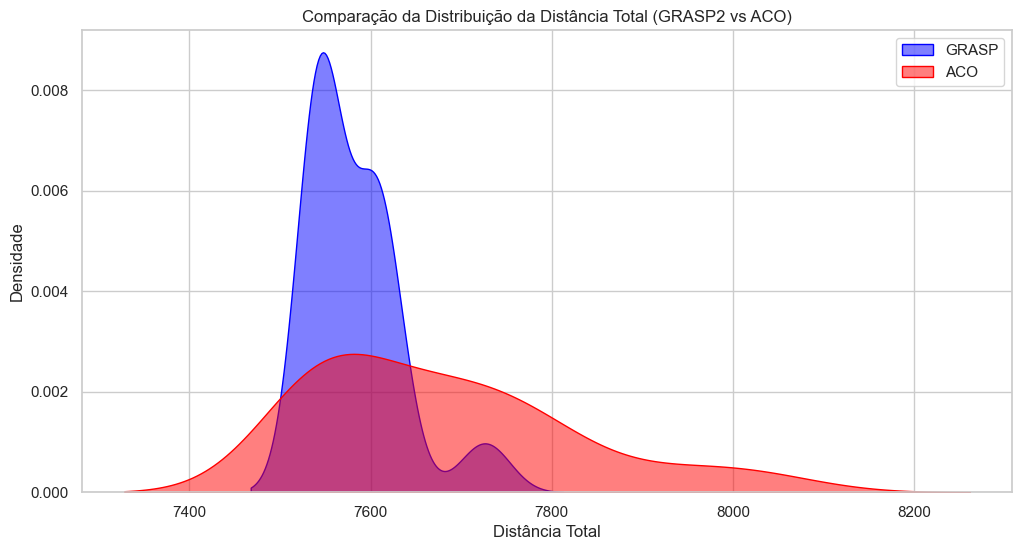

In [26]:
# Configurações do gráfico
plt.figure(figsize=(12, 6))

# Gráfico de densidade para GRASP
sns.kdeplot(df_grasp_berlin52['distancia_total'].dropna(), color='blue', label='GRASP', fill=True, alpha=0.5)

# Gráfico de densidade para ACO
sns.kdeplot(df_aco_berlin52['distancia_total'].dropna(), color='red', label='ACO', fill=True, alpha=0.5)

# Adicionar título e rótulos
plt.title('Comparação da Distribuição da Distância Total (GRASP2 vs ACO)')
plt.xlabel('Distância Total')
plt.ylabel('Densidade')
plt.legend()

# Mostrar o gráfico
plt.show()


### Comparar Distribuição do Tempo de Execução entre GRASP2 e ACO


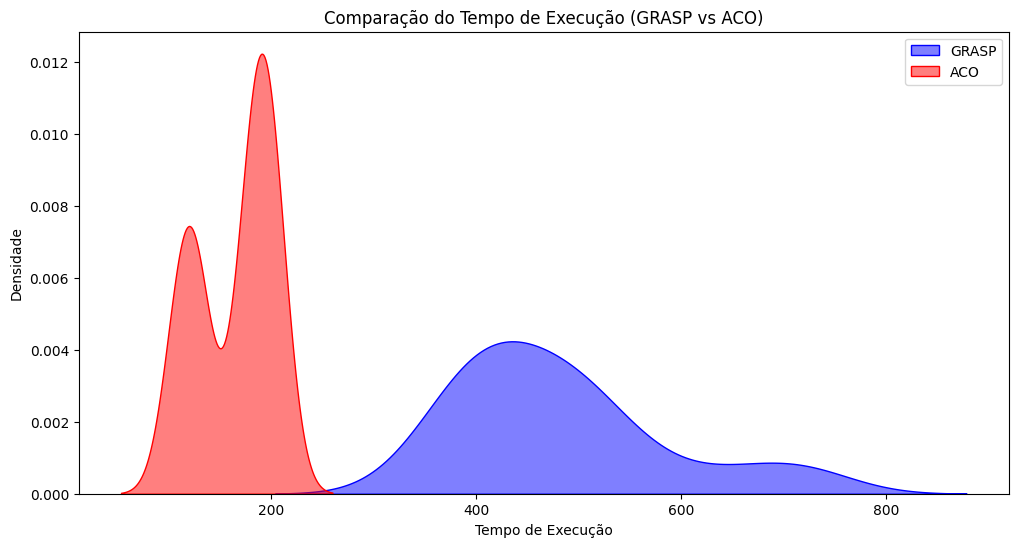

In [27]:
# Configurações do gráfico
plt.figure(figsize=(12, 6))

# Gráfico de densidade para GRASP
sns.kdeplot(df_grasp_berlin52['tempo_execucao'].dropna(), color='blue', label='GRASP', fill=True, alpha=0.5)

# Gráfico de densidade para ACO
sns.kdeplot(df_aco_berlin52['tempo_execucao'].dropna(), color='red', label='ACO', fill=True, alpha=0.5)

# Adicionar título e rótulos
plt.title('Comparação do Tempo de Execução (GRASP vs ACO)')
plt.xlabel('Tempo de Execução')
plt.ylabel('Densidade')
plt.legend()

# Mostrar o gráfico
plt.show()


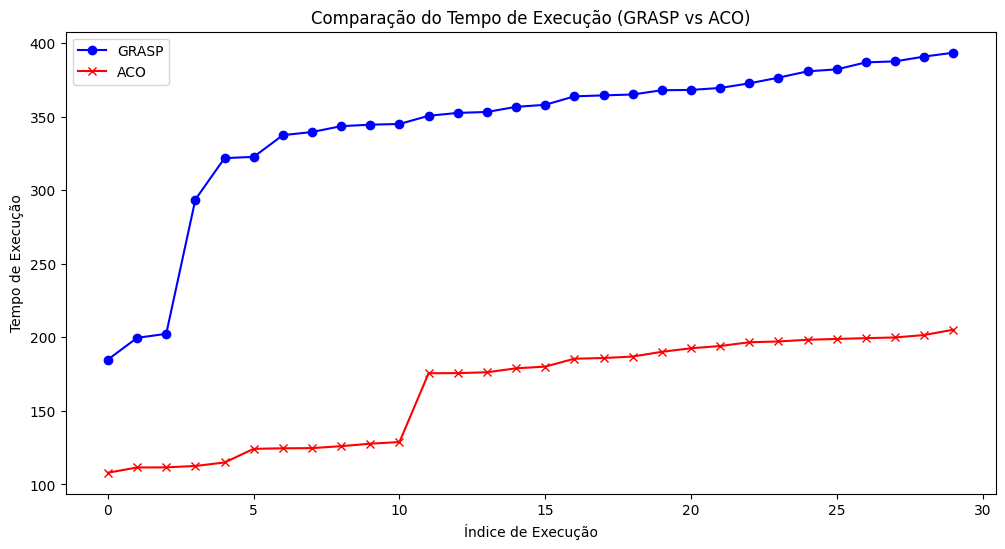

In [28]:
# Extraindo os dados
tempos_grasp = df_grasp_berlin52['tempo_execucao'].dropna()
tempos_aco = df_aco_berlin52['tempo_execucao'].dropna()

# Ordenar os dados para melhor visualização
tempos_grasp_sorted = sorted(tempos_grasp)
tempos_aco_sorted = sorted(tempos_aco)

# Criar índices para as linhas
indices_grasp = range(len(tempos_grasp_sorted))
indices_aco = range(len(tempos_aco_sorted))

# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(indices_grasp, tempos_grasp_sorted, label='GRASP', color='blue', marker='o')
plt.plot(indices_aco, tempos_aco_sorted, label='ACO', color='red', marker='x')

# Adicionar título e rótulos
plt.title('Comparação do Tempo de Execução (GRASP vs ACO)')
plt.xlabel('Índice de Execução')
plt.ylabel('Tempo de Execução')
plt.legend()

# Mostrar o gráfico
plt.show()


### Histórico de custos do ACO - Ulysses16

C:\Users\Plugify\AppData\Local\Temp\ipykernel_9604\2854221194.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


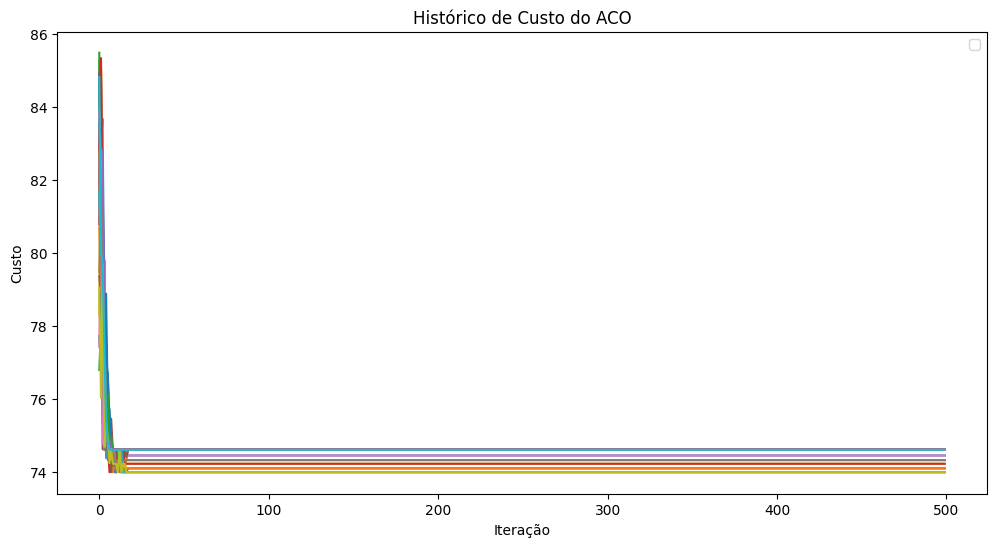

In [37]:
plt.figure(figsize=(12, 6))
for i, custos in enumerate(df_aco_ulysses16['historico_custos']):
    if isinstance(custos, (list, np.ndarray)):
        plt.plot(custos)
plt.title('Histórico de Custo do ACO')
plt.xlabel('Iteração')
plt.ylabel('Custo')
plt.legend()
plt.show()


Desvio Padrão da distância total

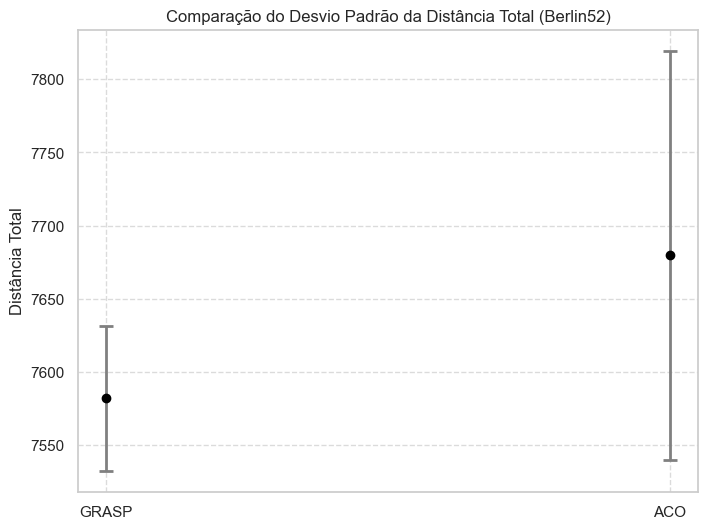

In [27]:
# Calcular o desvio padrão da distância total para GRASP e ACO berlin52
std_grasp = np.std(df_grasp_berlin52['distancia_total'].dropna())
std_aco = np.std(df_aco_berlin52['distancia_total'].dropna())

# Valores médios para cada algoritmo
mean_grasp = np.mean(df_grasp_berlin52['distancia_total'].dropna())
mean_aco = np.mean(df_aco_berlin52['distancia_total'].dropna())

# Dados para o gráfico
algoritmos = ['GRASP', 'ACO']
medias = [mean_grasp, mean_aco]
desvios = [std_grasp, std_aco]

# Criar o gráfico de erro
plt.figure(figsize=(8, 6))

# Plotar o gráfico de erro
plt.errorbar(algoritmos, medias, yerr=desvios, fmt='o', color='black', 
            ecolor='gray', elinewidth=2, capsize=5, capthick=2)

# Adicionar título e rótulos
plt.title('Comparação do Desvio Padrão da Distância Total (Berlin52)')
plt.ylabel('Distância Total')
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.show()


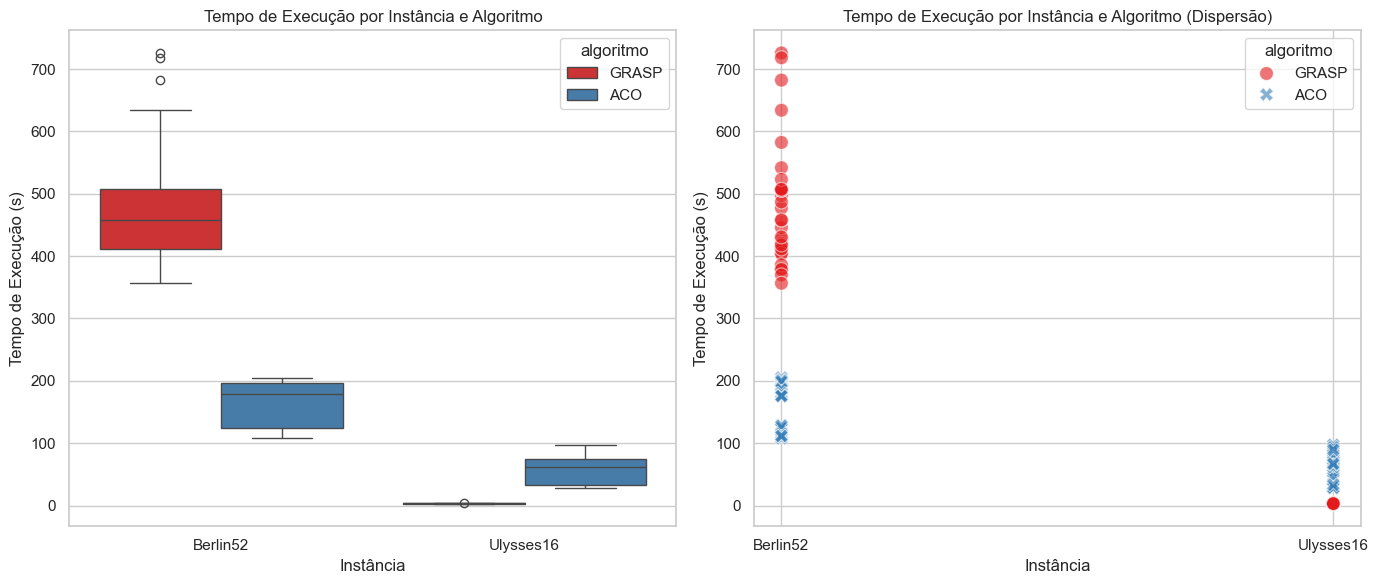

In [31]:
# Adicionar instância e algoritmo aos dataframes
df_grasp_berlin52['instancia'] = 'Berlin52'
df_aco_berlin52['instancia'] = 'Berlin52'
df_grasp_ulysses16['instancia'] = 'Ulysses16'
df_aco_ulysses16['instancia'] = 'Ulysses16'

# Adicionar algoritmo aos dataframes
df_grasp_berlin52['algoritmo'] = 'GRASP'
df_aco_berlin52['algoritmo'] = 'ACO'
df_grasp_ulysses16['algoritmo'] = 'GRASP'
df_aco_ulysses16['algoritmo'] = 'ACO'

# Combinar dataframes para comparação
df_combined = pd.concat([
    df_grasp_berlin52[['tempo_execucao', 'instancia', 'algoritmo']],
    df_aco_berlin52[['tempo_execucao', 'instancia', 'algoritmo']],
    df_grasp_ulysses16[['tempo_execucao', 'instancia', 'algoritmo']],
    df_aco_ulysses16[['tempo_execucao', 'instancia', 'algoritmo']]
])

import matplotlib.pyplot as plt
import seaborn as sns

# Configurações dos gráficos
plt.figure(figsize=(14, 6))

# Tempo de Execução por Instância e Algoritmo
plt.subplot(1, 2, 1)
sns.boxplot(data=df_combined, x='instancia', y='tempo_execucao', hue='algoritmo', palette='Set1')
plt.title('Tempo de Execução por Instância e Algoritmo')
plt.xlabel('Instância')
plt.ylabel('Tempo de Execução (s)')

# Adicionar gráfico de dispersão (opcional) para visualizar as diferenças
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_combined, x='instancia', y='tempo_execucao', hue='algoritmo', style='algoritmo', palette='Set1', s=100, alpha=0.6)
plt.title('Tempo de Execução por Instância e Algoritmo (Dispersão)')
plt.xlabel('Instância')
plt.ylabel('Tempo de Execução (s)')

plt.tight_layout()
plt.show()

In [32]:
# Definir o intervalo de valores para n
n = np.arange(1, 21)  # De 1 a 20 para manter o gráfico legível

# Constantes ajustadas para simular tempos de execução mais realistas
k = 1e-6  # Constante para Força Bruta
c = 1e-4  # Constante para GRASP
d = 1e-3  # Constante para Colônia de Formigas

# Tempo de execução estimado para Força Bruta usando O(n!)
tempo_forca_bruta = [math.factorial(i) * k for i in n]

# Calcular o tempo de execução para GRASP e Colônia de Formigas
tempo_grasp = c * n**2
tempo_colonia_formigas = d * n * np.log(n + 1)  # Usar n + 1 para evitar log(0)

# Criar o gráfico
plt.figure(figsize=(12, 8))

# Plotar os tempos de execução
plt.plot(n, tempo_forca_bruta, label='Força Bruta', color='blue', marker='o')
plt.plot(n, tempo_grasp, label='GRASP', color='red', marker='s')
plt.plot(n, tempo_colonia_formigas, label='Colônia de Formigas', color='green', marker='^')

# Adicionar título e rótulos aos eixos
plt.title('Simulação do Tempo de Execução dos Algoritmos')
plt.xlabel('Número de Cidades (n)')
plt.ylabel('Tempo de Execução')
plt.legend()

# Mostrar o gráfico
plt.grid(True)
plt.yscale('log')  # Usar escala logarítmica para melhor visualização
plt.show()



NameError: name 'math' is not defined

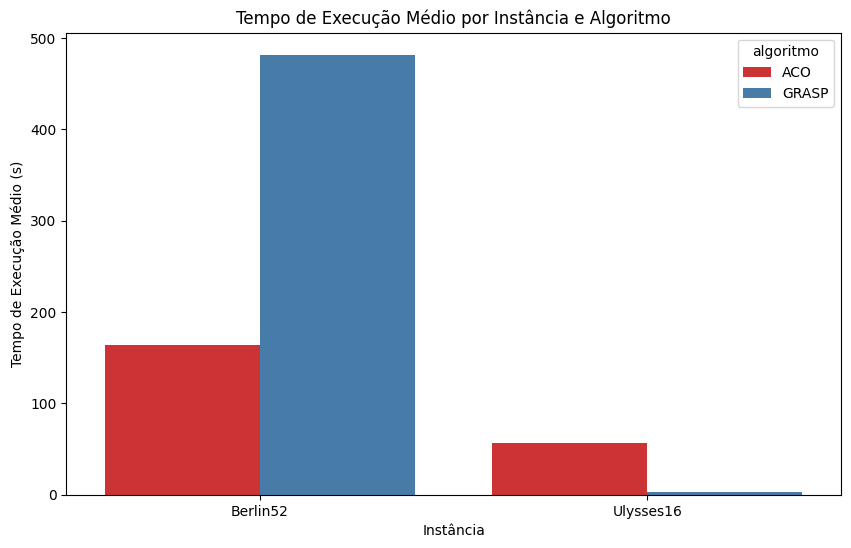

In [188]:
# Calcular a média do tempo de execução para cada combinação de instância e algoritmo
df_mean_times = df_combined.groupby(['instancia', 'algoritmo'])['tempo_execucao'].mean().reset_index()

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_mean_times, x='instancia', y='tempo_execucao', hue='algoritmo', palette='Set1')
plt.title('Tempo de Execução Médio por Instância e Algoritmo')
plt.xlabel('Instância')
plt.ylabel('Tempo de Execução Médio (s)')
plt.show()


In [192]:
df_combined['instancia'] = df_combined['instancia'].astype('category')


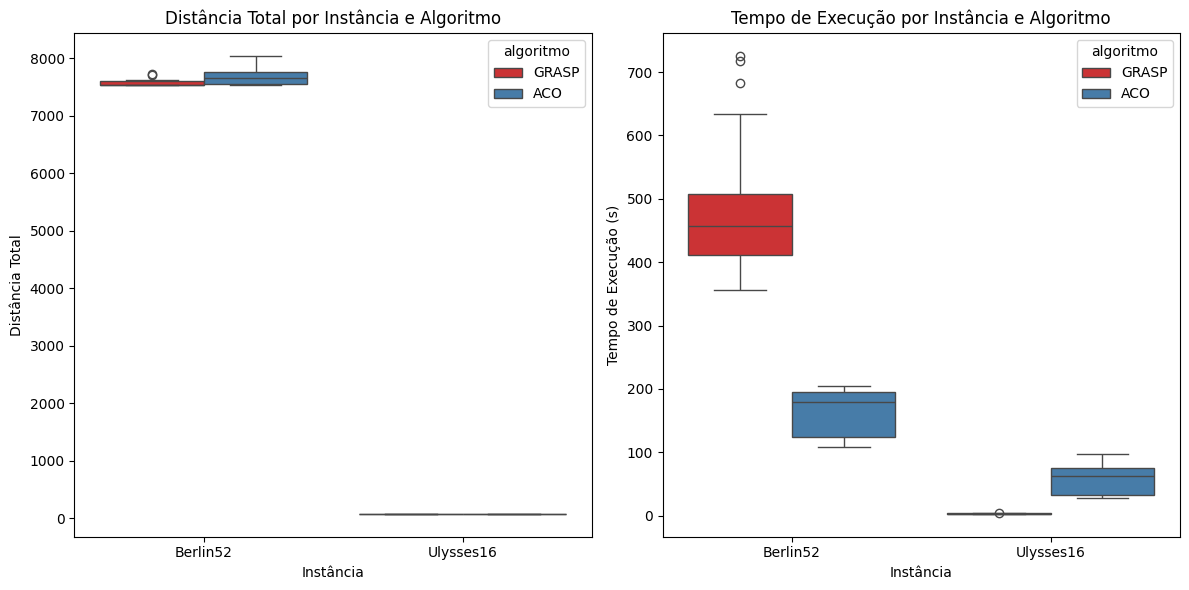

In [194]:
plt.figure(figsize=(12, 6))

# Gráfico de Caixa para Distância Total
plt.subplot(1, 2, 1)
sns.boxplot(data=df_combined, x='instancia', y='distancia_total', hue='algoritmo', palette='Set1')
plt.title('Distância Total por Instância e Algoritmo')
plt.xlabel('Instância')
plt.ylabel('Distância Total')

# Gráfico de Caixa para Tempo de Execução
plt.subplot(1, 2, 2)
sns.boxplot(data=df_combined, x='instancia', y='tempo_execucao', hue='algoritmo', palette='Set1')
plt.title('Tempo de Execução por Instância e Algoritmo')
plt.xlabel('Instância')
plt.ylabel('Tempo de Execução (s)')

plt.tight_layout()
plt.show()


### Melhor Caminho de Cada Execução


In [59]:
print("Melhor Caminho Encontrado em Cada Execução (GRASP):")
print(df_grasp['melhor_caminho'])

print("Melhor Caminho Encontrado em Cada Execução (ACO):")
print(df_aco['melhor_caminho'])


Melhor Caminho Encontrado em Cada Execução (GRASP):
0     [24, 5, 15, 6, 4, 25, 12, 28, 27, 26, 47, 13, ...
1     [30, 23, 20, 50, 29, 16, 46, 44, 34, 35, 36, 3...
2     [51, 11, 52, 14, 13, 47, 26, 27, 28, 12, 25, 4...
3     [30, 23, 20, 50, 29, 16, 46, 44, 34, 35, 36, 3...
4     [52, 14, 13, 47, 26, 27, 28, 12, 25, 4, 6, 15,...
5     [21, 17, 3, 18, 31, 22, 1, 49, 32, 45, 19, 41,...
6     [21, 17, 3, 18, 31, 22, 1, 49, 32, 45, 19, 41,...
7     [3, 17, 21, 42, 7, 2, 30, 23, 20, 50, 29, 16, ...
8     [9, 10, 43, 33, 51, 11, 52, 14, 13, 47, 26, 27...
9     [16, 46, 44, 34, 35, 36, 39, 40, 37, 38, 48, 2...
10    [33, 43, 10, 9, 8, 41, 19, 45, 32, 49, 1, 22, ...
11    [10, 9, 8, 41, 19, 45, 32, 49, 1, 22, 31, 18, ...
12    [51, 11, 52, 14, 13, 47, 26, 27, 28, 12, 25, 4...
13    [51, 11, 52, 14, 13, 47, 26, 27, 28, 12, 25, 4...
14    [52, 14, 13, 47, 26, 27, 28, 12, 25, 4, 6, 15,...
15    [43, 10, 9, 8, 41, 19, 45, 32, 49, 1, 22, 31, ...
16    [51, 11, 52, 14, 13, 47, 26, 27, 28, 12, 25, 4

### Distância do Melhor Caminho e Distância a Cada Iteração


In [60]:
print("Distância do Melhor Caminho (GRASP):")
print(df_grasp_berlin52['distancia_total'])

print("Distância do Melhor Caminho (ACO):")
print(df_aco_berlin52['distancia_total'])

print("Distâncias ao Longo das Iterações (ACO):")
print(df_aco_berlin52['historico_custos'])


Distância do Melhor Caminho (GRASP):
0     7544.365902
1     7544.365902
2     7544.365902
3     7544.365902
4     7544.365902
5     7544.365902
6     7544.365902
7     7544.365902
8     7544.365902
9     7544.365902
10    7544.365902
11    7598.442341
12    7656.578347
13    7598.442341
14    7544.365902
15    7619.153101
16    7544.365902
17    7544.365902
18    7544.365902
19    7544.365902
20    7544.365902
21    7544.365902
22    7544.365902
23    7544.365902
24    7544.365902
25    7544.365902
26    7544.365902
27    7677.682683
28    7544.365902
29    7544.365902
Name: distancia_total, dtype: float64
Distância do Melhor Caminho (ACO):
0     7544.662211
1     7566.166573
2     7544.365902
3     7766.315181
4     7658.958320
5     7792.090716
6     7544.662211
7     8045.484031
8     7937.300155
9     7686.710372
10    7704.379796
11    7856.792487
12    7548.992710
13    7663.504996
14    7659.254630
15    7544.662211
16    7566.166573
17    7658.581878
18    7768.082452
19    77

### Tempo de Cada Execução

In [114]:
print("Tempo de Execução (GRASP):")
print(df_grasp['tempo_execucao'])

print("Tempo de Execução (ACO):")
print(df_aco['tempo_execucao'])


Tempo de Execução (GRASP):
0     393.362165
1     321.735095
2     352.467708
3     343.447249
4     344.938755
5     339.475983
6     357.967802
7     372.544813
8     353.092376
9     364.976711
10    350.505248
11    368.082068
12    376.416092
13    367.863462
14    390.751163
15    386.804173
16    356.583404
17    387.482341
18    380.720548
19    382.055626
20    363.715854
21    369.415639
22    364.376872
23    184.846538
24    202.337363
25    199.576733
26    322.585545
27    344.450253
28    293.608757
29    337.328048
Name: tempo_execucao, dtype: float64
Tempo de Execução (ACO):
0     192.511251
1     190.100915
2     112.525396
3     178.888939
4     185.870478
5     198.841116
6     125.978789
7     124.648139
8     199.380465
9     128.772880
10    124.526896
11    124.166963
12    205.144175
13    201.507750
14    194.047342
15    196.592266
16    197.135796
17    198.294509
18    127.660498
19    199.853411
20    185.412641
21    114.884706
22    107.930485
23    186.

## Estatísticas Básicas: Média, Mediana e Moda


In [39]:
# Função para calcular a moda manualmente
def calcular_moda_manual(series):
    # Arredondar os valores para baixo para inteiros
    series_arredondada = np.floor(series.dropna()).astype(int)
    
    # Criar uma Series com a contagem de frequência dos valores
    frequencias = pd.Series(series_arredondada).value_counts()
    
    # Verificar se a Series de frequências não está vazia
    if not frequencias.empty:
        # Encontrar o valor com a maior frequência
        moda = frequencias.idxmax()
        return moda
    return np.nan


#Cálculo para Grasp Alpha
mean_grasp2 = df_grasp_alpha['tempo_execucao'].mean()
mode_grasp2 = calcular_moda_manual(df_grasp_alpha['tempo_execucao'])
median_grasp2 = df_grasp_alpha['tempo_execucao'].median()


# Cálculo para ACO
mean_aco = df_aco['tempo_execucao'].mean()
mode_aco = calcular_moda_manual(df_aco['tempo_execucao'])
median_aco = df_aco['tempo_execucao'].median()

print(f"GRASP - Média: {mean_grasp2:.2f}, Moda: {mode_grasp2:.2f}, Mediana: {median_grasp2:.2f}")

print(f"ACO - Média: {mean_aco:.2f}, Moda: {mode_aco:.2f}, Mediana: {median_aco:.2f}")


GRASP - Média: 481.81, Moda: 507.00, Mediana: 457.80
ACO - Média: 164.40, Moda: 124.00, Mediana: 179.47


### Desvio Padrão


In [34]:
# Desvio padrão para ACO
desvio_padrao_tempo_aco = df_aco['tempo_execucao'].std()
desvio_padrao_distancia_aco = df_aco['distancia_total'].std()

print("ACO:")
print(f"Desvio padrão do tempo de execução: {desvio_padrao_tempo_aco}")
print(f"Desvio padrão da distância total: {desvio_padrao_distancia_aco}")

# Desvio padrão para GRASP2 (assumindo que df_grasp já está definido)
desvio_padrao_tempo_grasp2 = df_grasp_alpha['tempo_execucao'].std()
desvio_padrao_distancia_grasp2 = df_grasp_alpha['distancia_total'].std()

print("\nGRASP:")
print(f"Desvio padrão do tempo de execução: {desvio_padrao_tempo_grasp2}")
print(f"Desvio padrão da distância total: {desvio_padrao_distancia_grasp2}")



ACO:
Desvio padrão do tempo de execução: 35.887050801327646
Desvio padrão da distância total: 142.19700449353545

GRASP:
Desvio padrão do tempo de execução: 100.51633812420704
Desvio padrão da distância total: 50.42840517537939


### Mínimo e máximo de tempo e comparação com o mínimo da distância total


In [41]:
# Mínimo e máximo do tempo de execução
min_tempo_grasp2 = df_grasp_berlin52['tempo_execucao'].min()
max_tempo_grasp2 = df_grasp_berlin52['tempo_execucao'].max()
min_tempo_aco = df_aco_berlin52['tempo_execucao'].min()
max_tempo_aco = df_aco_berlin52['tempo_execucao'].max()

# Mínimo da distância total
min_distancia_grasp2 = df_grasp_berlin52['distancia_total'].min()

min_distancia_aco = df_aco_berlin52['distancia_total'].min()


print(f"GRASP - Tempo de Execução: Min {min_tempo_grasp2}, Max {max_tempo_grasp2}")
print(f"ACO - Tempo de Execução: Min {min_tempo_aco}, Max {max_tempo_aco}")
print(f"GRASP - Distância Total Mínima: {min_distancia_grasp2}")
print(f"ACO - Distância Total Mínima: {min_distancia_aco}")


GRASP - Tempo de Execução: Min 356.48894453048706, Max 725.777072429657
ACO - Tempo de Execução: Min 107.93048477172852, Max 205.14417481422424
GRASP - Distância Total Mínima: 7544.365901904089
ACO - Distância Total Mínima: 7544.365901904086


In [42]:
import pandas as pd
from tabulate import tabulate

# Definir os dados
dados = {
    "Algoritmo": ["GRASP", "ACO"],
    "Tempo de Execução - Min": [min_tempo_grasp2, min_tempo_aco],
    "Tempo de Execução - Max": [max_tempo_grasp2, max_tempo_aco],
    "Distância Total Mínima": [min_distancia_grasp2, min_distancia_aco]
}

# Criar DataFrame
tabela = pd.DataFrame(dados)

# Exibir tabela formatada
print(tabulate(tabela, headers='keys', tablefmt='grid', floatfmt=".2f"))


+----+-------------+---------------------------+---------------------------+--------------------------+
|    | Algoritmo   |   Tempo de Execução - Min |   Tempo de Execução - Max |   Distância Total Mínima |
+====+=============+===========================+===========================+==========================+
|  0 | GRASP       |                    356.49 |                    725.78 |                  7544.37 |
+----+-------------+---------------------------+---------------------------+--------------------------+
|  1 | ACO         |                    107.93 |                    205.14 |                  7544.37 |
+----+-------------+---------------------------+---------------------------+--------------------------+


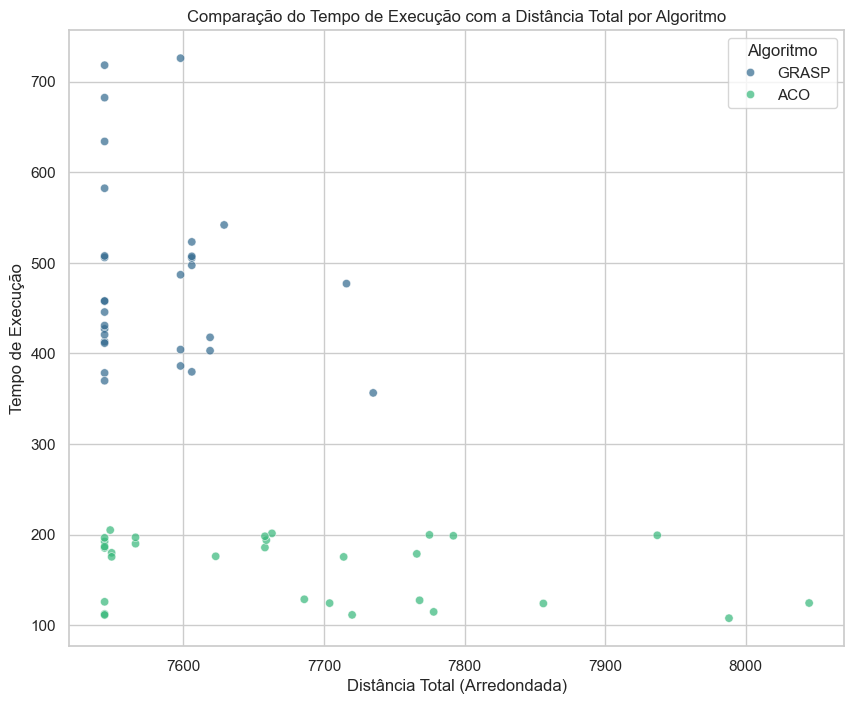

In [62]:
# Arredondar as distâncias totais para inteiros
df_grasp_berlin52['distancia_total_inteira'] = df_grasp_berlin52['distancia_total'].dropna().apply(np.floor).astype(int)
df_aco_berlin52['distancia_total_inteira'] = df_aco_berlin52['distancia_total'].dropna().apply(np.floor).astype(int)

# Criar DataFrame combinando os dados
dados_combinados = pd.DataFrame({
    'Tempo de Execução': pd.concat([df_grasp_berlin52['tempo_execucao'], df_aco['tempo_execucao']]),
    'Distância Total': pd.concat([df_grasp_berlin52['distancia_total_inteira'], df_aco['distancia_total_inteira']]),
    'Algoritmo': ['GRASP'] * len(df_grasp_berlin52) + ['ACO'] * len(df_aco)
})

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dados_combinados, x='Distância Total', y='Tempo de Execução', hue='Algoritmo', palette='viridis', alpha=0.7)
plt.title('Comparação do Tempo de Execução com a Distância Total por Algoritmo')
plt.xlabel('Distância Total (Arredondada)')
plt.ylabel('Tempo de Execução')
plt.legend(title='Algoritmo')
plt.show()


### Ponto de Convergência - Berlin52


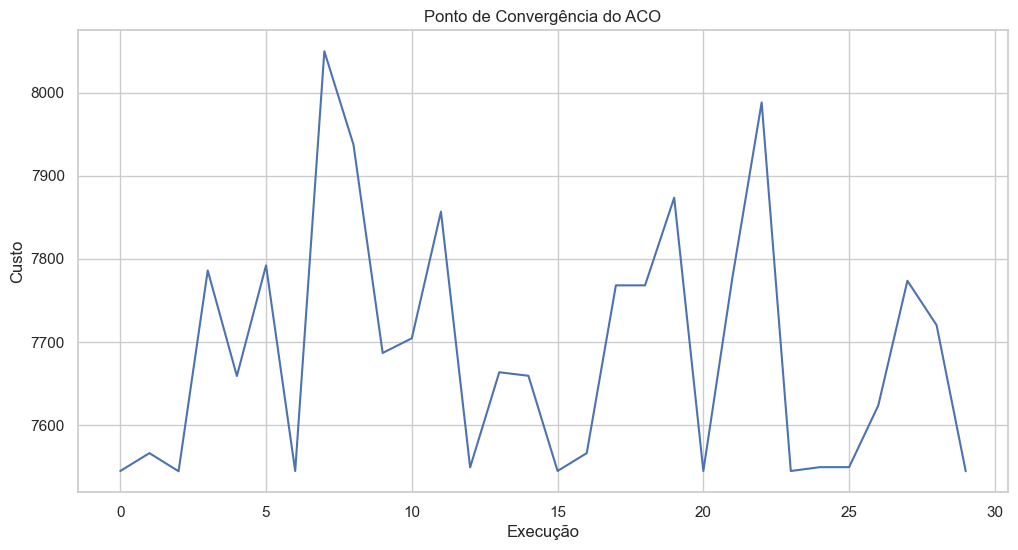

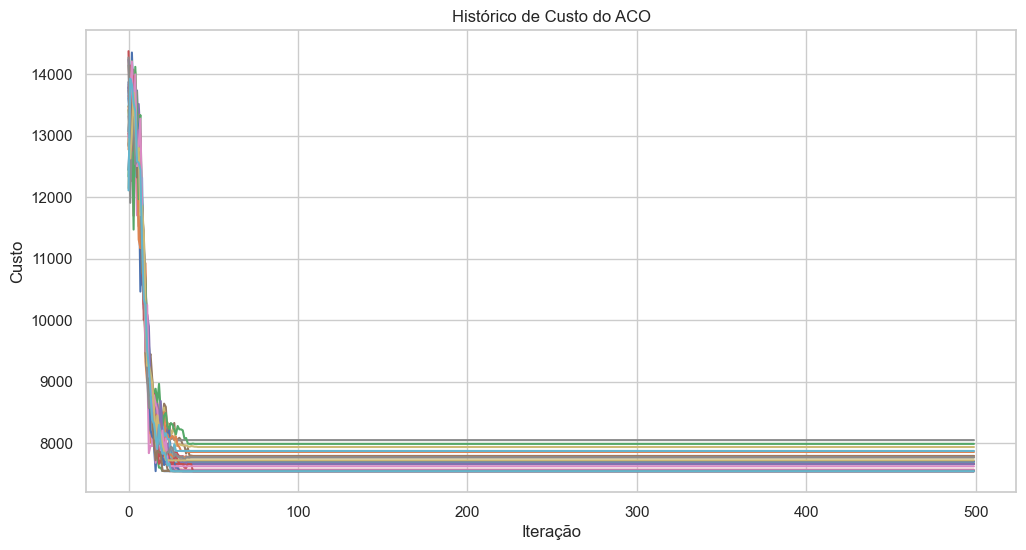

In [63]:
# Ponto de convergência (último valor) e histórico de custo
plt.figure(figsize=(12, 6))
plt.plot(df_aco_berlin52['historico_custos'].apply(lambda x: x[-1] if isinstance(x, list) else np.nan), label='Ponto de Convergência')
plt.title('Ponto de Convergência do ACO')
plt.xlabel('Execução')
plt.ylabel('Custo')
plt.show()

plt.figure(figsize=(12, 6))
for i, custos in enumerate(df_aco_berlin52['historico_custos']):
    plt.plot(custos, label=f'Execução {i+1}')
plt.title('Histórico de Custo do ACO')
plt.xlabel('Iteração')
plt.ylabel('Custo')
plt.show()


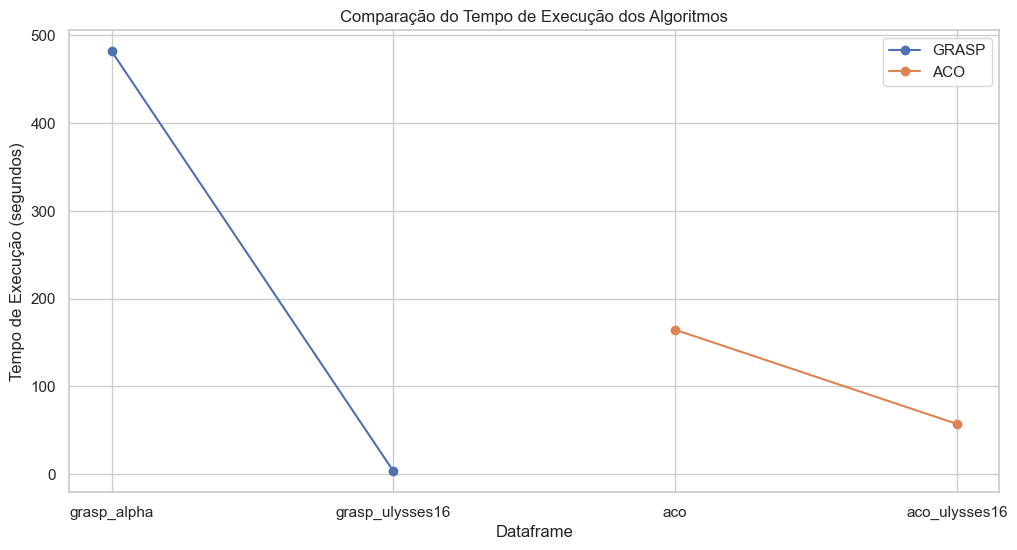

In [33]:
# Cria um DataFrame para armazenar os tempos de execução médios por algoritmo e por dataframe
data = {
    'Dataframe': ['grasp_alpha', 'aco', 'aco_ulysses16', 'grasp_ulysses16'],
    'Algoritmo': ['GRASP', 'ACO', 'ACO', 'GRASP'],
    'Tempo de Execução': [
        df_grasp_berlin52['tempo_execucao'].mean(),
        df_aco_berlin52['tempo_execucao'].mean(),
        df_aco_ulysses16['tempo_execucao'].mean(),
        df_grasp_ulysses16['tempo_execucao'].mean()
    ]
}

# Criar o DataFrame consolidado
df_tempo_execucao = pd.DataFrame(data)

# Plotar o gráfico de linha
plt.figure(figsize=(12, 6))

for algoritmo in df_tempo_execucao['Algoritmo'].unique():
    df_subset = df_tempo_execucao[df_tempo_execucao['Algoritmo'] == algoritmo]
    plt.plot(df_subset['Dataframe'], df_subset['Tempo de Execução'], marker='o', label=algoritmo)

plt.title('Comparação do Tempo de Execução dos Algoritmos')
plt.xlabel('Dataframe')
plt.ylabel('Tempo de Execução (segundos)')
plt.legend()
plt.grid(True)
plt.show()


In [127]:
print("Colunas do DataFrame df_grasp_alpha:", df_grasp_berlin52.columns)
print("Colunas do DataFrame df_aco:", df_aco_berlin52.columns)
print("Colunas do DataFrame df_aco_ulysses16:", df_aco_ulysses16.columns)
print("Colunas do DataFrame df_grasp_ulysses16:", df_grasp_ulysses16.columns)


Colunas do DataFrame df_grasp_alpha: Index(['execucao_num', 'melhor_caminho', 'tempo_execucao', 'distancia_total',
       'historico_custos', 'execucao', 'algoritmo'],
      dtype='object')
Colunas do DataFrame df_aco: Index(['execucao', 'melhor_caminho', 'distancia_total', 'tempo_execucao',
       'historico_custos', 'melhor_caminho_final', 'melhor_caminho_iteracoes',
       'distancia_total_inteira', 'algoritmo'],
      dtype='object')
Colunas do DataFrame df_aco_ulysses16: RangeIndex(start=0, stop=0, step=1)
Colunas do DataFrame df_grasp_ulysses16: Index(['execucao_num', 'melhor_caminho', 'tempo_execucao', 'distancia_total',
       'historico_custos', 'execucao'],
      dtype='object')
